In [1]:
import torch
from dataclasses import dataclass


@dataclass
class Action:
    action: torch.Tensor
    action_type: str
    action_name: str
    action_id: str
    action_description: str

In [2]:
cls = Action(0, 1, 2, 3, 4)

In [ ]:
for name in dir(cls):
    if not name.startswith("_"):
        print(name)
        print(getattr(cls, name))

action
0
action_description
4
action_id
3
action_name
2
action_type
1


: 

In [8]:
from dataset import prepare_dataloaders

example_actions, dataloader_train, dataloader_evals = prepare_dataloaders(256)

/mnt/virtual_ai0001071-01239_SR006-nfs2/afedorov/projects/vqvae_lattent_actions/dataset.py:345: UserWarning: register_resolver() is deprecated.
See https://github.com/omry/omegaconf/issues/426 for migration instructions.

  OmegaConf.register_resolver(


Creating LeRobot dataset for repo_id: aloha_aij

filtering aloha_aij: 7308 -> 7308 episodes

Initialized PromptFromLeRobotTaskTorch with 1858 tasks.

map_to_unified_space: False

Creating LeRobot dataset for repo_id: rdt

filtering rdt: 6002 -> 6002 episodes

Initialized PromptFromLeRobotTaskTorch with 272 tasks.

map_to_unified_space: False

Creating LeRobot dataset for repo_id: aloha_aij

filtering aloha_aij: 30 -> 30 episodes

Initialized PromptFromLeRobotTaskTorch with 1858 tasks.

map_to_unified_space: False

Creating LeRobot dataset for repo_id: rdt

filtering rdt: 30 -> 30 episodes

Initialized PromptFromLeRobotTaskTorch with 272 tasks.

map_to_unified_space: False

In [9]:
len(dataloader_evals['aloha_aij']), len(dataloader_evals['rdt'])

(10, 67)

In [ ]:
from itertools import count

for i, j in count(range(5)):
    print(i, j)

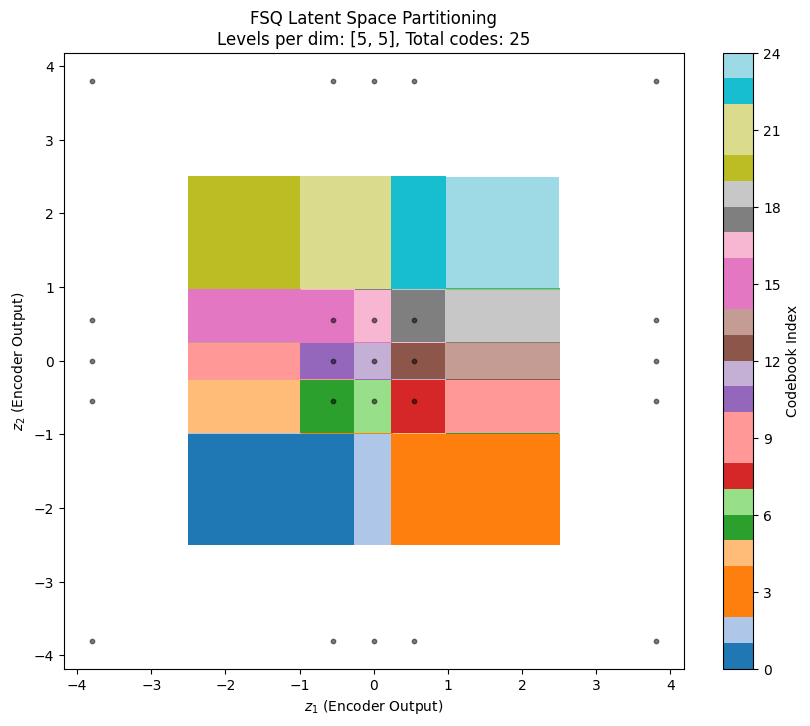

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fsq_quantization_visualization():
    # Параметры
    d = 2
    levels = [5, 5] # 5 уровней на измерение = 25 "кодов"
    
    # Создаем пространство значений (выход энкодера до tanh)
    x = np.linspace(-2.5, 2.5, 400)
    y = np.linspace(-2.5, 2.5, 400)
    X, Y = np.meshgrid(x, y)
    
    # 1. Bounding (tanh)
    X_bounded = np.tanh(X)
    Y_bounded = np.tanh(Y)
    
    # 2. Scaling to [0, L-1]
    # Формула: (z + 1)/2 * (levels - 1)
    X_scaled = (X_bounded + 1) / 2 * (levels[0] - 1)
    Y_scaled = (Y_bounded + 1) / 2 * (levels[1] - 1)
    
    # 3. Rounding (Quantization)
    X_quant = np.round(X_scaled)
    Y_quant = np.round(Y_scaled)
    
    # Вычисляем индексы для раскраски
    # Index = x_idx + y_idx * levels[0]
    Indices = X_quant + Y_quant * levels[0]
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Indices, levels=np.prod(levels), cmap='tab20')
    plt.colorbar(label='Codebook Index')
    
    # Сетка границ (приблизительно, где происходит переключение)
    # Границы возникают там, где tanh(z) переходит через полуцелые значения в масштабированном пространстве
    plt.title(f'FSQ Latent Space Partitioning\nLevels per dim: {levels}, Total codes: {np.prod(levels)}')
    plt.xlabel('$z_1$ (Encoder Output)')
    plt.ylabel('$z_2$ (Encoder Output)')
    plt.grid(False)
    
    # Добавим отображение центроидов (идеальных значений) в исходном пространстве
    # Обратное преобразование (de-quantization -> atanh)
    for i in range(levels[0]):
        for j in range(levels[1]):
            # map int back to [-1, 1]
            val_x = (i / (levels[0]-1)) * 2 - 1
            val_y = (j / (levels[1]-1)) * 2 - 1
            # map back through atanh (с защитой от inf)
            val_x = np.arctanh(val_x * 0.999) 
            val_y = np.arctanh(val_y * 0.999)
            plt.scatter(val_x, val_y, c='black', s=10, alpha=0.5)

    plt.show()

fsq_quantization_visualization()